In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("testFeatures.csv")
train_data.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [3]:
#encoder: Kategorik -> numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
# ürün sayısal hale getirme
urunSayisal = le.fit_transform(train_data.iloc[:,1])
urunSayisal_test = le.fit_transform(test_data.iloc[:, 2])

# üretim yerini sayısal hale getirme
uretimYeriSayisal = le.fit_transform(train_data.iloc[:,-3:-2])
uretimYeriSayisal_test = le.fit_transform(test_data.iloc[:,-3:-2])

#sehirleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
sehirSayisal = ohe.fit_transform(train_data["şehir"].values.reshape(-1,1)).toarray()
sehirSayisal_test = ohe.fit_transform(test_data["şehir"].values.reshape(-1,1)).toarray()

#marketleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
marketSayisal = ohe.fit_transform(train_data["market"].values.reshape(-1,1)).toarray()
marketSayisal_test = ohe.fit_transform(test_data["market"].values.reshape(-1,1)).toarray()

#ürün kategorisini sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
urunKategoriSayisal = ohe.fit_transform(train_data["ürün kategorisi"].values.reshape(-1,1)).toarray()
urunKategoriSayisal_test = ohe.fit_transform(test_data["ürün kategorisi"].values.reshape(-1,1)).toarray()

#tarihi sayısal hale getirme
train_data['tarih'] = pd.to_datetime(train_data['tarih'])
train_data["Yıl"] = train_data["tarih"].dt.year
train_data["Ay"] = train_data["tarih"].dt.month
train_data["Gün"] = train_data["tarih"].dt.day

# Test verisi tarihi sayısal hale getirme
test_data['tarih'] = pd.to_datetime(test_data['tarih'])
test_data["Yıl"] = test_data["tarih"].dt.year
test_data["Ay"] = test_data["tarih"].dt.month
test_data["Gün"] = test_data["tarih"].dt.day

C:\Users\ALPPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
#numpy dizileri dataframe donusumu
urunSayisal = pd.DataFrame(data = urunSayisal, index = range(227520), columns=["ürün"])
uretimYeriSayisal = pd.DataFrame(data = uretimYeriSayisal, index = range(227520), columns=["üYeri"])
sehirSayisal = pd.DataFrame(data = sehirSayisal, index = range(227520), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal = pd.DataFrame(data = marketSayisal, index = range(227520), columns=["marketB","marketC","marketM"])
urunKategoriSayisal = pd.DataFrame(data = urunKategoriSayisal, index = range(227520), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])

#Test verisi numpy dizileri dataframe donusumu
urunSayisal_test = pd.DataFrame(data = urunSayisal_test, index = range(45504), columns=["ürün"])
uretimYeriSayisal_test = pd.DataFrame(data = uretimYeriSayisal_test, index = range(45504), columns=["üYeri"])
sehirSayisal_test = pd.DataFrame(data = sehirSayisal_test, index = range(45504), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal_test = pd.DataFrame(data = marketSayisal_test, index = range(45504), columns=["marketB","marketC","marketM"])
urunKategoriSayisal_test = pd.DataFrame(data = urunKategoriSayisal_test, index = range(45504), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])


In [6]:
#dataframe birlestirme islemi
b1= pd.concat([sehirSayisal, train_data.iloc[:,-3:]], axis=1)
b2= pd.concat([marketSayisal, b1], axis=1)
b3= pd.concat([uretimYeriSayisal, b2], axis=1)
b4 = pd.concat([train_data.iloc[:,2], b3], axis=1)
b5= pd.concat([urunSayisal, b4], axis=1)
numerikVeri= pd.concat([urunKategoriSayisal, b5], axis=1)
numerikVeri = numerikVeri.drop(["Gün"], axis=1)

In [7]:
#Testverisi dataframe birlestirme islemi
b1_test= pd.concat([sehirSayisal_test, test_data.iloc[:,-3:]], axis=1)
b2_test= pd.concat([marketSayisal_test, b1_test], axis=1)
b3_test= pd.concat([uretimYeriSayisal_test, b2_test], axis=1)
b4_test= pd.concat([test_data.iloc[:,3], b3_test], axis=1)
b5_test= pd.concat([urunSayisal_test, b4_test], axis=1)
numerikVeri_test= pd.concat([urunKategoriSayisal_test, b5_test], axis=1)
numerikVeri_test = numerikVeri_test.drop(["Gün"], axis=1)

In [8]:
# veri setindeki istenen fiyat listesi
y=train_data.iloc[:,4]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = numerikVeri
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)


In [11]:
type(y_test)

pandas.core.series.Series

In [12]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
"""
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
"""

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(256, activation="gelu"))
model.add(Dense(256, activation="gelu"))
model.add(Dense(256, activation="gelu"))
model.add(Dense(1))

model.compile(optimizer="nadam", loss="mse")

In [17]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size=250,epochs=150)

Epoch 1/150
610/610 [==============================] - 4s 5ms/step - loss: 78.8531 - val_loss: 57.5481
Epoch 2/150
610/610 [==============================] - 3s 5ms/step - loss: 55.6985 - val_loss: 53.9415
Epoch 3/150
610/610 [==============================] - 3s 5ms/step - loss: 44.3470 - val_loss: 38.9192
Epoch 4/150
610/610 [==============================] - 3s 5ms/step - loss: 29.7473 - val_loss: 25.6152
Epoch 5/150
610/610 [==============================] - 3s 5ms/step - loss: 18.0381 - val_loss: 14.3542
Epoch 6/150
610/610 [==============================] - 3s 5ms/step - loss: 13.4094 - val_loss: 10.9041
Epoch 7/150
610/610 [==============================] - 3s 5ms/step - loss: 11.0817 - val_loss: 10.0438
Epoch 8/150
610/610 [==============================] - 3s 5ms/step - loss: 9.9151 - val_loss: 9.4189
Epoch 9/150
610/610 [==============================] - 3s 5ms/step - loss: 9.2802 - val_loss: 10.2492
Epoch 10/150
610/610 [==============================] - 3s 5ms/step - loss: 

610/610 [==============================] - 3s 5ms/step - loss: 0.7461 - val_loss: 0.5645
Epoch 82/150
610/610 [==============================] - 3s 5ms/step - loss: 0.7258 - val_loss: 0.5092
Epoch 83/150
610/610 [==============================] - 3s 5ms/step - loss: 0.6755 - val_loss: 2.3752
Epoch 84/150
610/610 [==============================] - 3s 5ms/step - loss: 0.4842 - val_loss: 0.4394
Epoch 85/150
610/610 [==============================] - 3s 5ms/step - loss: 1.1128 - val_loss: 1.9946
Epoch 86/150
610/610 [==============================] - 3s 5ms/step - loss: 1.7551 - val_loss: 1.4420
Epoch 87/150
610/610 [==============================] - 3s 5ms/step - loss: 1.2726 - val_loss: 1.1396
Epoch 88/150
610/610 [==============================] - 3s 5ms/step - loss: 1.0183 - val_loss: 1.1055
Epoch 89/150
610/610 [==============================] - 3s 5ms/step - loss: 0.8006 - val_loss: 0.7334
Epoch 90/150
610/610 [==============================] - 3s 5ms/step - loss: 0.8086 - val_loss: 

<AxesSubplot:>

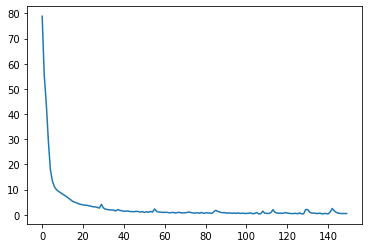

In [18]:
import seaborn as sbn
loss= model.history.history["loss"]
sbn.lineplot(x=range(len(loss)), y=loss)

In [19]:
kayipVerisi = pd.DataFrame(model.history.history)

In [20]:
kayipVerisi.head()

,loss,val_loss
0,78.853058,57.548122
1,55.698460,53.941456
2,44.346958,38.919209
3,29.747316,25.615191
4,18.038095,14.354246


<AxesSubplot:>

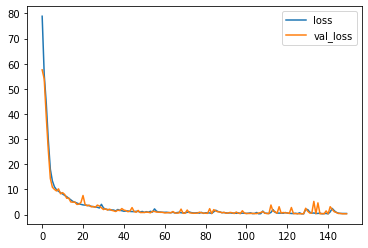

In [21]:
kayipVerisi.plot()

In [22]:
trainLoss= model.evaluate(x_train, y_train, verbose=0)
trainLoss

0.3089410066604614

In [23]:
testLoss = model.evaluate(x_test, y_test, verbose=0)
testLoss

0.3383992314338684

In [24]:
testTahminleri = model.predict(x_test)
testTahminleri

array([[15.107016 ],
       [ 6.4795756],
       [38.616817 ],
       ...,
       [ 9.430327 ],
       [ 8.19326  ],
       [16.420887 ]], dtype=float32)

In [25]:
tahminDF = pd.DataFrame(y_test.values, columns=["Gerçek Y"])

In [26]:
tahminDF

,Gerçek Y
0,14.76
1,6.19
2,38.22
3,9.84
4,7.64
...,...
75077,8.95
75078,8.86
75079,9.00
75080,8.00


In [27]:
testTahminleri = pd.Series(testTahminleri.reshape(75082,))

In [28]:
testTahminleri

0        15.107016
1         6.479576
2        38.616817
3         9.297857
4         7.551893
           ...    
75077     8.820503
75078     8.687081
75079     9.430327
75080     8.193260
75081    16.420887
Length: 75082, dtype: float32

In [29]:
tahminDF = pd.concat([tahminDF, testTahminleri], axis=1)
tahminDF.columns = ["Gerçek Y", "Tahmin Y"]

In [30]:
tahminDF.head(50)

,Gerçek Y,Tahmin Y
0,14.76,15.107016
1,6.19,6.479576
2,38.22,38.616817
3,9.84,9.297857
4,7.64,7.551893
5,27.07,26.802965
6,20.08,20.171902
7,19.69,19.226751
8,12.82,13.042183
9,19.25,18.828110


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

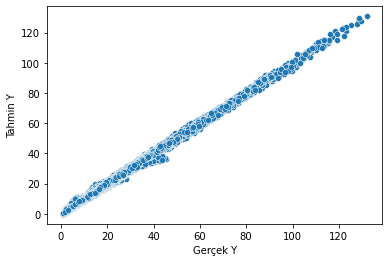

In [31]:
sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDF)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [33]:
train_data.describe()

,ürün besin değeri,ürün fiyatı,Yıl,Ay,Gün
count,227520.000000,227520.000000,227520.000000,227520.00000,227520.0
mean,143.113924,16.348622,2018.000000,6.50000,1.0
std,133.218871,13.260935,1.414217,3.45206,0.0
min,8.000000,0.730000,2016.000000,1.00000,1.0
25%,41.000000,7.330000,2017.000000,3.75000,1.0
50%,83.000000,12.600000,2018.000000,6.50000,1.0
75%,250.000000,20.900000,2019.000000,9.25000,1.0
max,402.000000,141.330000,2020.000000,12.00000,1.0


In [34]:
mean_absolute_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

0.40471509358983315

In [35]:
mean_squared_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

0.3383995490964878

In [36]:
numerikVeri

,et,kuruyemiş,meyve,sebze ve bakliyat,süt ürünlei ve kahvaltılık,tahıl ve ürünleri,ürün,ürün besin değeri,üYeri,marketB,...,sehirA,sehirB,sehirC,sehirD,sehirE,sehirF,sehirG,sehirH,Yıl,Ay
0,1.0,0.0,0.0,0.0,0.0,0.0,65,120,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
1,1.0,0.0,0.0,0.0,0.0,0.0,70,103,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
2,1.0,0.0,0.0,0.0,0.0,0.0,61,160,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
3,0.0,0.0,0.0,1.0,0.0,0.0,1,354,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
4,0.0,0.0,0.0,1.0,0.0,0.0,2,72,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227515,0.0,1.0,0.0,0.0,0.0,0.0,59,110,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227516,0.0,1.0,0.0,0.0,0.0,0.0,60,115,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227517,0.0,1.0,0.0,0.0,0.0,0.0,62,100,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227518,0.0,1.0,0.0,0.0,0.0,0.0,55,110,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12


In [37]:
yeni_urun=[[1, 0, 0, 0, 0, 0, 65, 120, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2021, 1]]
yeni_urun = scaler.transform(yeni_urun)
model.predict(yeni_urun)

array([[113.17403]], dtype=float32)